<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/6_Decision_Tree_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree vs. Logistic Regression

## Logistic regression

In [1]:
import pandas as pd
wine = pd.read_csv('https://raw.githubusercontent.com/kjmobile/data/main/ml/wine_csv.csv')

In [2]:
wine.shape

(6497, 4)

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
# prints information about a DataFrame
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=17)

In [8]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7856455647488936
0.7676923076923077


In [11]:
lr.score?

### Interpretability of models (logistic regression vs. decision tree)

In [12]:
print(lr.coef_, lr.intercept_)

[[ 0.56294821  1.68493066 -0.71566399]] [1.79736738]


## Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state=17) # what's the default criterion in sklearn?
dt.fit(train_scaled, train_target) # what is target variable here?

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target)) # does it show the model is overfitted?

0.9976909755628247
0.8507692307692307


In [14]:
plot_tree?

Object `plot_tree` not found.


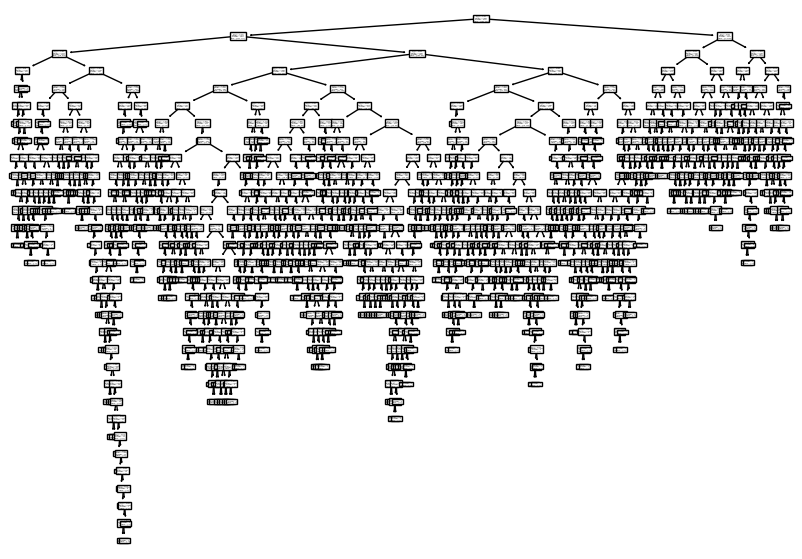

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

### Pruning

In [16]:
# prune to avoid overfitting.
dt = DecisionTreeClassifier(max_depth=4, random_state=17, criterion='entropy')
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target)) # did this ameliorate overfitting ?

0.8551087165672503
0.8646153846153846


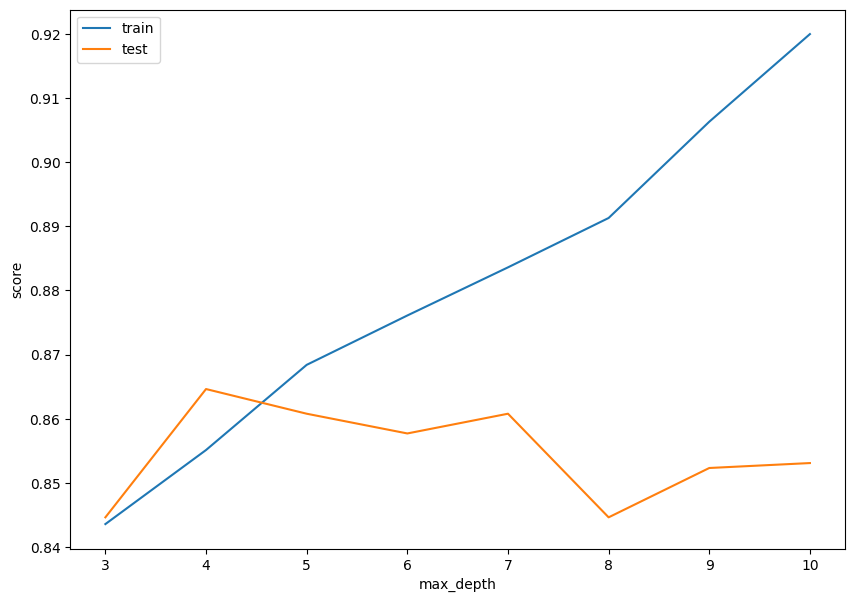

In [17]:
# Why chose max_depth= 4? : Draw a comparison of train vs test scores through a plot by changing max_depth from 3 to 10

train_scores = []
test_scores = []

for max_depth in range(3, 11):
    dt1 = DecisionTreeClassifier(max_depth=max_depth, random_state=17, criterion='entropy')
    dt1.fit(train_scaled, train_target)

    train_scores.append(dt1.score(train_scaled, train_target))
    test_scores.append(dt1.score(test_scaled, test_target))

plt.figure(figsize=(10, 7))
plt.plot(range(3, 11), train_scores, label="train")
plt.plot(range(3, 11), test_scores, label="test")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show()


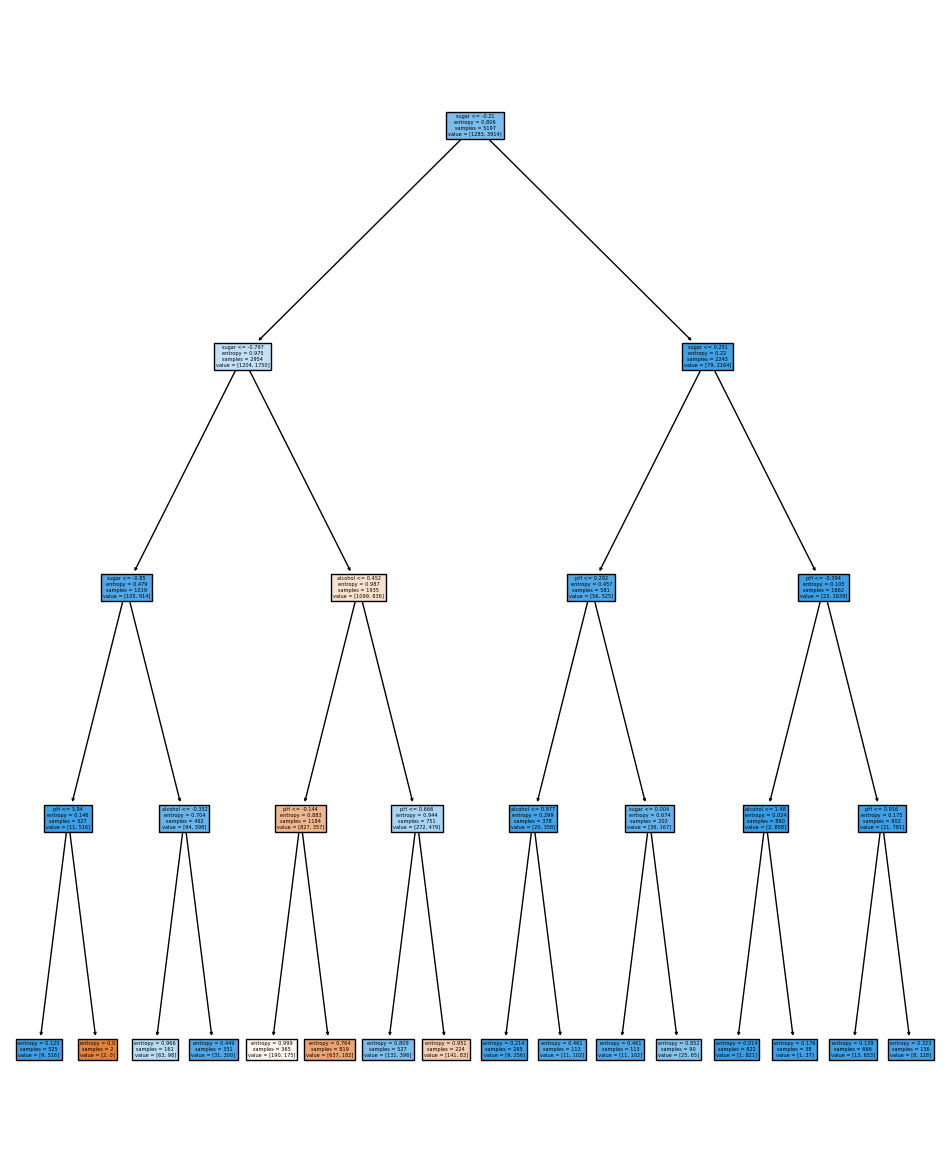

In [18]:
# now plot the tree!
plt.figure(figsize=(12,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # when filled=True, does the filled color have any meaning ?
plt.show()

In [19]:
print(dt.feature_importances_) # what does the feature_importance_ show and how, it is used in other modeling?

[0.11293851 0.79208984 0.09497165]


## Question

### Predict categories using the test_input


In [20]:
dt_prediction = dt.predict(test_input)
print(dt_prediction)

[1. 1. 1. ... 1. 1. 1.]


### Show Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_target, dt_prediction)
cm_df=pd.DataFrame(cm, columns=['predicted_0', 'predict_1'], index=['actual_0','actual_1'])
print(cm_df)

          predicted_0  predict_1
actual_0            0        316
actual_1            0        984


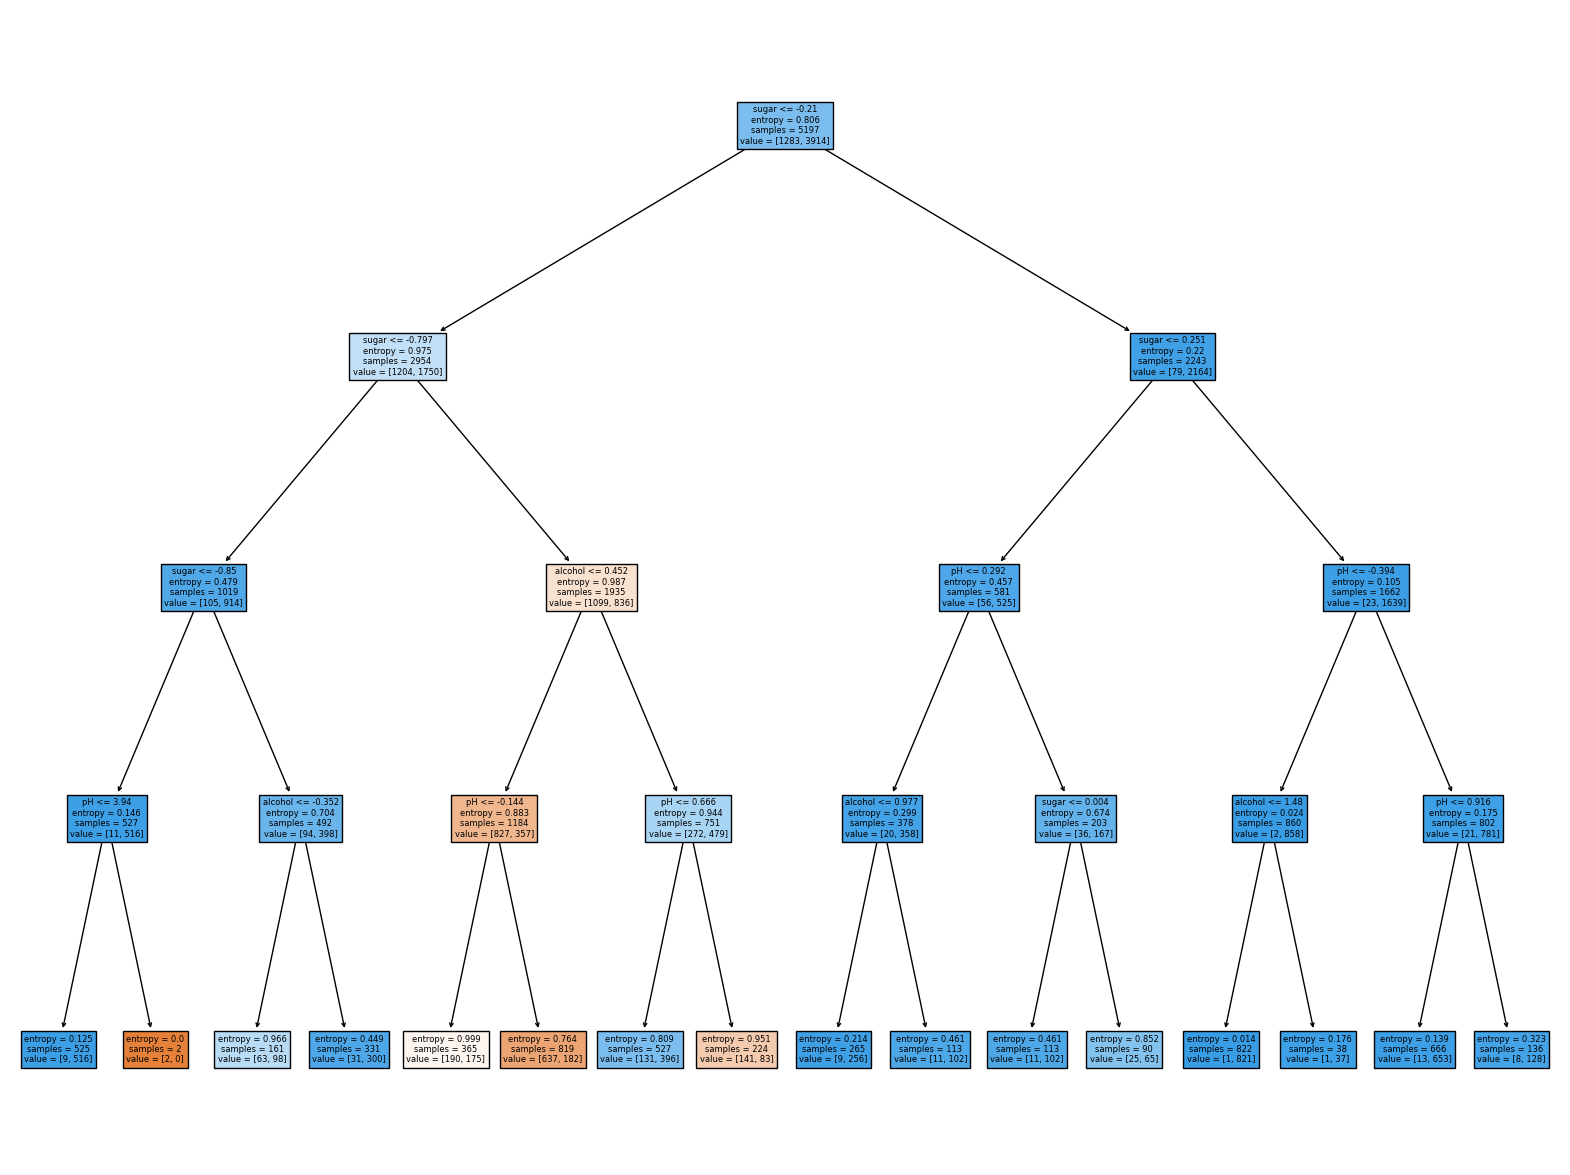

In [22]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### Understand Information Gain

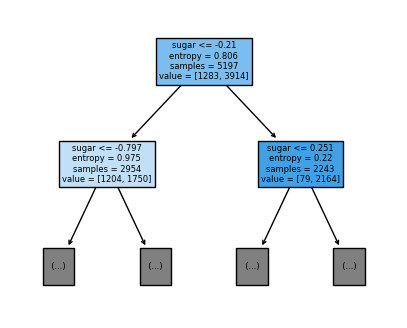

In [27]:
plt.figure(figsize=(5,4))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # what if you do not pass the argument of feature_names?
plt.show()

In [32]:
# In the above chart the inital entropy is .806 and
# when the data (5197) is split ( 2954 [on left] + 2243 [on right]), entropy per each is 0.975 and 0.22
# Hence the information gain by this split is:

initial_entropy = 0.806
left_entropy = 0.975
right_entropy = 0.22
left_proportion = 2954 / (2954 + 2243)
right_proportion = 2243 / (2954 + 2243)
entropy_after_split = left_proportion * left_entropy + right_proportion * right_entropy
information_gain = 0  # fix the line here to compute information gain correctly.
print(f'I(Dp) : {initial_entropy}')
print(f'I(Dj): {entropy_after_split}')
print(f'IG : {information_gain}')


I(Dp) : 0.806
I(Dj): 0.6491456609582451
IG : 0


### Using min_impurity_decrease instead of max_depth

In [25]:
dt2 = DecisionTreeClassifier(min_impurity_decrease=0.001, random_state=17) #min_impurity_decrease= is used to replace what parameter used above?
dt2.fit(train_input, train_target)

print(dt2.score(train_input, train_target))
print(dt2.score(test_input, test_target))

0.8716567250336733
0.8646153846153846
